<a href="https://colab.research.google.com/github/thual/POM-ch8-oscillationsPropres/blob/main/oscillationsPropres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oscillations propres des chaines masses-ressourt

Activité : changez les paramètres des animations paquets d'onde!




# Pulsations propres normalisées
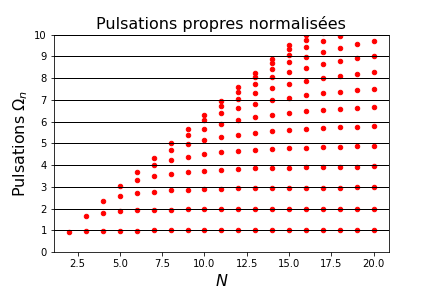

# Modes propres d'oscillation pour $N=5$
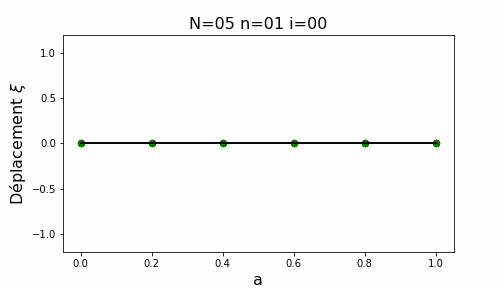

# Première partie du programme

Exécutez tout d'abord cette première partie du programme pour mettre en place les librairies et le sous-programme ! 

*   Colab : ⌘/Ctrl+F9 pour tout exécuter.
*   MyBinder : -> Run -> "Run all cells"


In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

print("Oscillations propres des systèmes discrets")

# Petits outils

def zfi(x,le=2):
    miss=le-len(str(x))
    a='0'*miss+str(x)
    return a

# Calculs de valeures propores
# ================================================

def Pulpropres(N):
    # Calcul de fréquences propres des modes propres en fonction de N
    # Define the matrix AN
    AN=np.zeros((N-1,N-1))
    AN[0,0]=-2; 
    if N > 2:
        AN[0,1]=1; AN[N-2,N-3]=1; AN[N-2,N-2]=-2;
        for i in range(1,N-2):
            AN[i,i-1]=1; AN[i,i]=-2; AN[i,i+1]=1;
    # Compute eigenvalues and eigenmodes
    Valp, Vecp=np.linalg.eig(AN)     
    Omega=N*(-Valp)**(.5)/np.pi
    sort_perm = Omega.argsort(); 
    Valp=Valp[sort_perm] 
    Vecp=Vecp[:, sort_perm]
    return Omega, Vecp
       

def Diapropres(Nmax):
    # Calcul de fréquences propres des modes propres en fonction de N
    for N in range(2,Nmax+1):
        print("Diagramme : Modes propres pour N="+zfi(N))
        Omega, Vecp=Pulpropres(N)

        # Tracé des pulsasions normalisées
        Num=np.linspace(N,N,N-1)
        ymin=0; ymax=10
        plt.yticks(np.linspace(0,10,11))
        plt.ylim(ymin,ymax) 
        plt.grid(color='black', axis='y', linestyle='-', linewidth=1)        
        plt.scatter(Num,Omega,marker='o',color='red',s=20)
        plt.xlabel(r'$N$',fontsize=16 )
        plt.ylabel(r'Pulsations $\Omega_n$',fontsize=16)
        plt.title(r'Pulsations propres normalisées',fontsize=16)
        #namepng='Omega-'+str(N)+'.png'; plt.savefig(namepng)
    plt.savefig('Omega'+ext)
    plt.show() 

      
 
 # Animation 
 # ================================================

def AniPulpropres(N): 
    # Animation du paquet d'ondes
    global fig, ax, name, fram
    global Vecp, a, acont, sc, pi
    
    Omega, Vecp=Pulpropres(N)
    a=np.linspace(0,1,N+1)
    acont=np.linspace(0,1,100)
    sc=.05; pi=np.pi; 
    fram=(N-1)*Nt

    # Preparation de la figure pour l'animation
    fig=plt.figure(1,figsize=(7,4))
    ax=plt.subplot(1,1,1)
    
    name="Oscillations propres N "+zfi(N)


    ani=Gifanim(anisimple)      
    return ani

# Fonction d'animations appelées par FuncAnimation
# ================================================

def anisimple(i):
    # Animation simple
    global fig, ax, name
    global Vecp, a, acont, sc, pi
    
    # Determination de m
    m=int(i/Nt)
    iloc=i-m*Nt
    n=1+m;
    xim=np.concatenate(([0],Vecp[:,m],[0]))/np.max(Vecp)
    cor=xim[1]/np.sin(n*pi*a[1])
    la=np.sin(2*pi*iloc/Nt)
    xi=la*xim
    xicont=la*np.sin(n*pi*acont)*cor      
    
    # Figure préparation
    ax.clear()
    ax.set_xlabel('a',fontsize=16 )
    ax.set_ylabel(r'Déplacement $\xi$',fontsize=16)
    
    title="N="+zfi(Nshow)+" n="+zfi(n)+" i="+zfi(iloc)
    ax.set_title(title,fontsize=16)
    ax.set_ylim(-ymax,ymax)
    
    # Figure tracés  
    ax.scatter(a,xi,marker='o',color='blue',s=40)
    ax.scatter(a+sc*xi,0*xi,marker='o',color='red',s=40)
    ax.scatter(a,0*xi,marker='o',color='green',s=40)
    ax.plot(acont,xicont,color='black')
    ax.plot(a,0*xi,color='black')
    
    basN='ResN='+zfi(Nshow)
    basNn=basN+'n='+zfi(n)

    # Sauver toutes les figures
    if FlagSavext: 
        basNni=basNn+'i='+zfi(iloc)+'.png'; 
        fig.savefig(basNni)


# Fonction Gifanim
# ================

def Gifanim(anifunc):
    global inter, fram
    global name
    ani=FuncAnimation(fig,anifunc,frames=fram,interval=inter,repeat=True)
    namegif=name+".gif"
    print(" ")   
    print("Simulation pour créer un gif animé")  
    ani.save(namegif,writer="pillow")
    print("   Gif animé créé :",namegif)
    # Visualisation animée de la simulation 
    print("Simulation pour visualiser l'animation")
    print("==================================")
    plt.close() 
    plt.rc('animation', html='jshtml')
    return ani

Oscillations propres des systèmes discrets


# Paramètres du programme

*(Colab : Cliquez sur le triangle à gauche de titre pour visualiser le code et changer les paramètres !)*

NB : les types d'ondes non activés sont lancés dans des lignes de commandes séparées, à la fin du programme.

**Paramètres principaux**
* `Ndiag` : Valeur de $N$ maximale pour le diagramme (20)
* `Nshow` : Valeur de $N$ pour l'animation (4)
* `Nt` : Nombre d'images pour l'animations d'un mode (12)

**Paramètres secondaires**
* `FlagSavext` : Sauver les  des fichiers
* `ext`: Extension des fichiers à sauver (.png, .pdf, .jpg, etc.)

**Types de tracé**
* `FlagPulpropres` : Tracé du diagramme des pulsation normalisées
* `FlagAniPulpropres` : Animation des modes pour $N=$`Nshow`

*Exécutez le code ci-dessous (Colab : cliquez sur "1 cellule masquée" pour changer les paramètres) !*

In [ ]:
F=False; T=True

# Paramètres principaux
Ndiag=20 # Nombre de modes maximal pour le tracé du diagramme
Nshow=4 # Nombre de points
Nt=12 # Nombre d'images pour chaque mode

# Choix de tracés 
FlagPulpropres=T
FlagAniPulpropres=T

# Paramètres auxiliaires
ymax=1.2 # Borne en y
ext=".png" # Extension des fichiers à sauver
FlagSavext=F # Création de fichier ext pour chaque image
inter=300; # millisecondes animation par défaut


# Diagramme 
if FlagPulpropres: Diapropres(Ndiag)

# Animations
ani="pas d'animation"
if FlagAniPulpropres: ani=AniPulpropres(Nshow)

# Animation 
# Cette commande doit rester la dernière pour être suivie d'effet
ani

 
Simulation pour créer un gif animé
   Gif animé créé : Oscillations propres N 04.gif
Simulation pour visualiser l'animation


# Animations supplémentaires

In [ ]:
#Paquet de trois ondes
Nshow=10; AniPulpropres(Nshow)

 
Simulation pour créer un gif animé
   Gif animé créé : Oscillations propres N 10.gif
Simulation pour visualiser l'animation
